Iris Project


Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Read dataSet

In [63]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking null values

In [65]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Seperate X and Y

In [66]:
X = df.drop(labels=["species"],axis = 1)
Y = df[["species"]]

In [67]:
X.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
Y.head(5)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


Apply label encoding on Y

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y["species"] = le.fit_transform(Y["species"])

In [70]:
Y["species"].head(5)

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

Save Label Encoder

In [71]:
import pickle
with open("LabelEnc.pkl","wb") as file:
    pickle.dump(le , file)

Perform Standard Scaling on Data

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
Xnew

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Save the Scalar in pkl

In [73]:
with open("Scalar.pkl","wb") as file:
    pickle.dump(ss,file)

Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(Xnew , Y , test_size=0.2, random_state=21)

Create KNN Model with hyperparameter tuning

In [75]:
params = {"n_neighbors":[3,4,5,6,7,8,9]}

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knnc = KNeighborsClassifier()
gscv = GridSearchCV(knnc,param_grid=params,cv=5,scoring ="f1_macro")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [77]:
gscv.best_params_

{'n_neighbors': 6}

In [78]:
gscv.best_score_

0.9597385620915034

In [79]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=6)

Save the model in pickle file

In [80]:
with open("model.pkl","wb") as file:
    pickle.dump(best_knn,file)


Evaluate model

In [81]:
# accuracy in Training
best_knn.score(xtrain,ytrain)

0.9666666666666667

In [82]:
# accuracy in Testing
best_knn.score(xtest,ytest)

0.9333333333333333

Plot the Confusion Matrix

In [83]:
pred_tr = best_knn.predict(xtrain)
pred_ts = best_knn.predict(xtest)

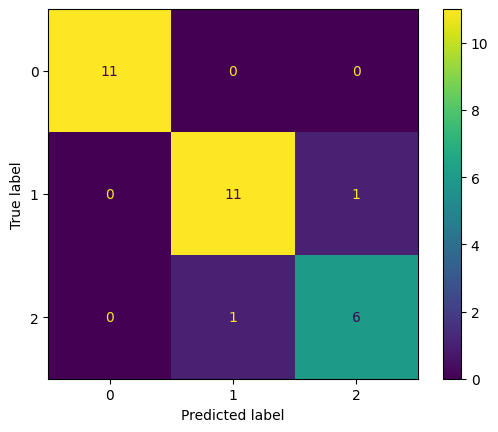

In [84]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,pred_ts)
cfd = ConfusionMatrixDisplay(cf , display_labels=best_knn.classes_)
cfd.plot()

Print Classification Report

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        12
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



checking the predictions

In [86]:
pred_tr[0:5]

array([0, 2, 1, 0, 2])

In [87]:
ytrain.head(5)

,species
41,0
131,2
70,1
46,0
126,2


In [88]:
pred_ts[0:5]

array([1, 0, 0, 0, 1])

In [89]:
ytest.head(5)

,species
92,1
44,0
7,0
21,0
95,1


Get the actual Labels

In [90]:
ypred_tr_lb = le.inverse_transform(pred_tr)
ypred_ts_lb = le.inverse_transform(pred_ts)

In [91]:
ypred_tr_lb

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'ver

In [92]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

Predicting a new Data point

In [93]:
def predict_data(scaler, le, model):
    # Take the input from user
    sep_l = float(input('Please Enter Sepal Length  : '))
    sep_w = float(input('Please Enter Sepal Width   : '))
    pet_l = float(input('Please Enter Petal Length  : '))
    pet_w = float(input('Please Enter Petal Width   : '))

    # Convert above into dataframe
    xxnew = pd.DataFrame([sep_l,sep_w,pet_l,pet_w]).T
    xxnew.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
    print('DataFrame Before Preprocessing : \n')
    display(xxnew)

    # Preprocess the dataframe
    xnew_pre = pd.DataFrame(scaler.transform(xxnew),columns=xxnew.columns)
    print('DataFrame after Preprocessing :\n')
    display(xnew_pre)

    # Perform the prediction
    pred = model.predict(xnew_pre)

    # Inverse Tranform using le
    pred1 = le.inverse_transform(pred)

    # Probability
    prob = model.predict_proba(xnew_pre).max()

    # Print the prediction with probanility
    print('\n=======================================================\n')
    print(f'Prediction  : {pred1[0]}')
    print(f'Probability : {prob:.4f}')

    return pred1[0], prob


In [94]:
predict_data(ss,le,best_knn)

DataFrame Before Preprocessing : 



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.1,3.1,6.0


DataFrame after Preprocessing :



,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,0.098217,-0.37399,6.319222




Prediction  : virginica
Probability : 1.0000


('virginica', 1.0)